# P1.2 QUANTUM NN
Alejando Mayorga Redondo
Fernando Mondragón Sampedro

### Introducción

### Preprocesado

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

wine_data = load_wine()
features = wine_data.data
labels = wine_data.target

features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20)
scaler = MinMaxScaler()
features_train = scaler(features_train)
features_test = scaler(features_test)

encoder = OneHotEncoder()
train_labels_oh = encoder.fit_transform(labels_train.reshape(-1, 1)).toarray()
test_labels_oh = encoder.fit_transform(labels_test.reshape(-1, 1)).toarray()




TypeError: 'MinMaxScaler' object is not callable

### Desarrollo de la QNN

#### State preparation

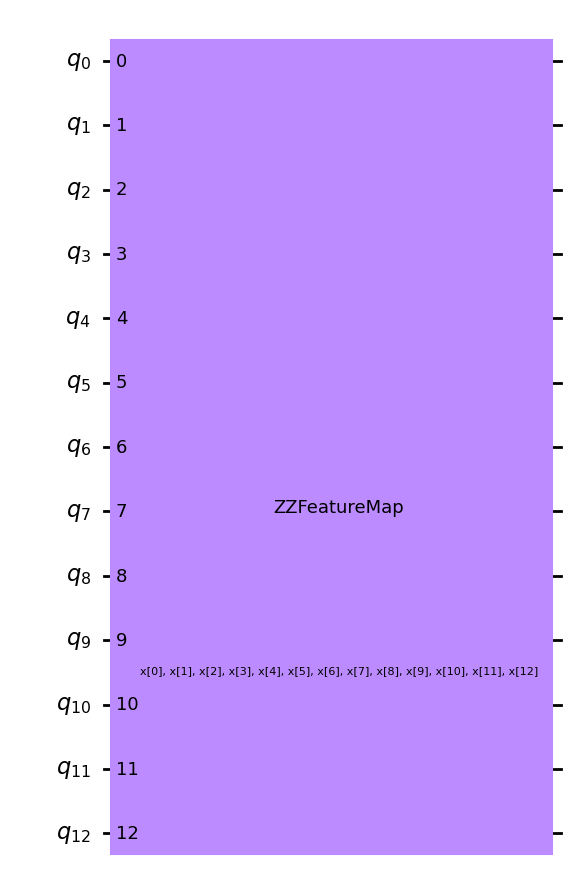

In [4]:
#Primero escogemos un método de encoding para las features. En nuestro caso optamos por el ZZFeatureMap
from qiskit.circuit.library import ZZFeatureMap
featureMap = ZZFeatureMap(feature_dimension=13, reps=1)
#featureMap.decompose().draw("mpl")
featureMap.draw("mpl")


#### Circuito clasificador

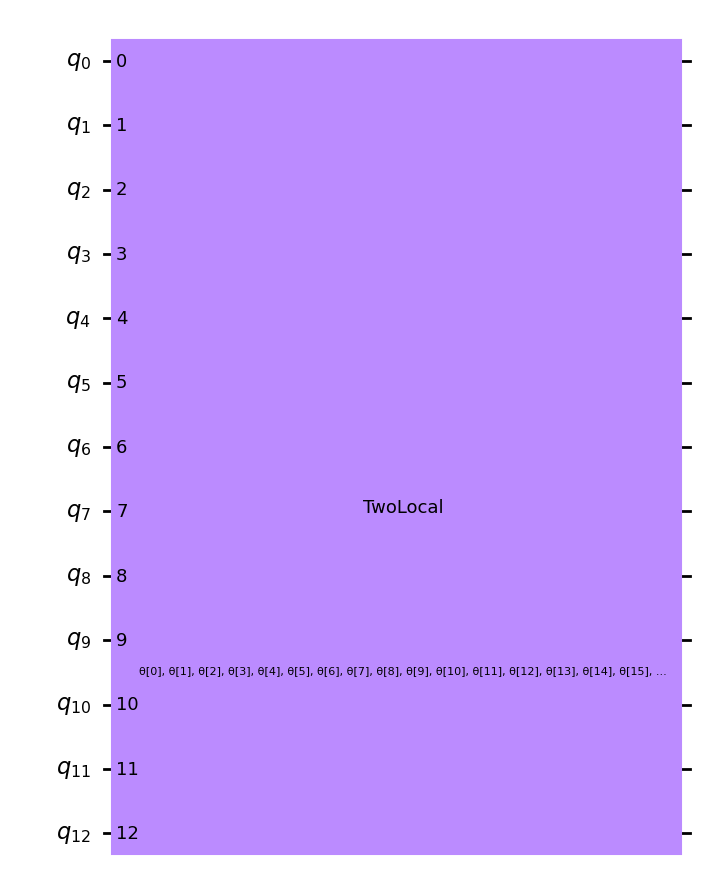

In [5]:
#Para el circuito clasificador utilizaremos TwoLocal
from qiskit.circuit.library import TwoLocal
classifier = TwoLocal(13, ['ry', 'rz'], 'cz', reps=1v)
#classifier.decompose().draw("mpl")
classifier.draw("mpl")

#### Optimizador 


In [9]:
#Hemos escogido el SCOBYLA optimizer para que el entrenamiento sea más rápido. Usamos la función de log de los apuntes
from qiskit.algorithms.optimizers import COBYLA

class OptimizerLog:
    """Log to store optimizer's intermediate results"""
    def __init__(self):
        self.evaluations = []
        self.parameters = []
        self.costs = []
    def update(self, evaluation, parameter, cost, _stepsize, _accept):
        """Save intermediate results. Optimizer passes five values
        but we ignore the last two."""
        self.evaluations.append(evaluation)
        self.parameters.append(parameter)
        self.costs.append(cost)

log = OptimizerLog()

optimizer = COBYLA(maxiter=100)


#### VQC

In [7]:
#Generamos un VQC con todas las opciones definidas anteriormente
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(feature_map=featureMap,
          ansatz=classifier,
          loss='cross_entropy',
          optimizer=SPSA(callback=log.update)) #, quantum_instance=BasicAer.get_backend('qasm_simulator'))


### Ejecución de la QNN

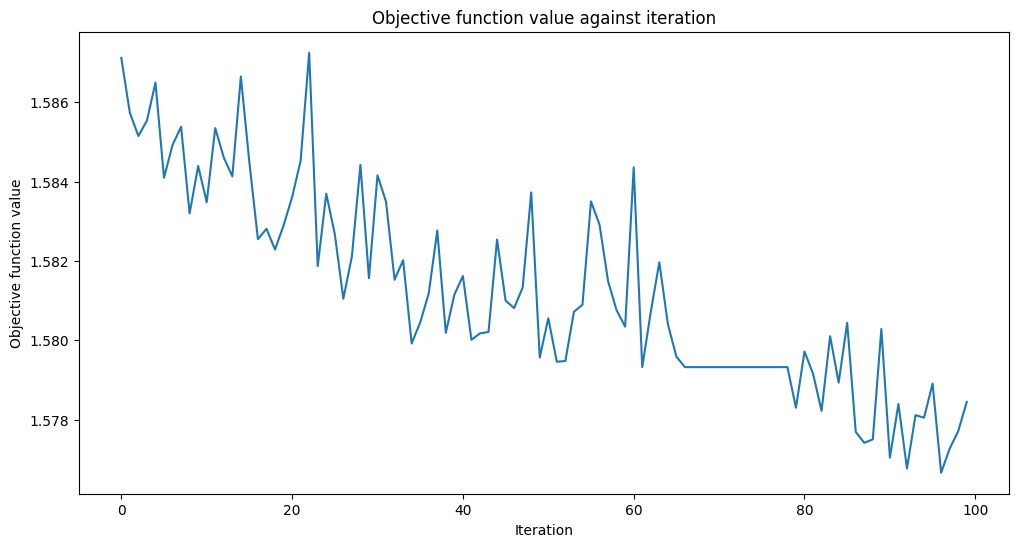

Training time: 14352 seconds


In [12]:
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time
from qiskit.primitives import Sampler

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()




#Entrenamos el modelo



sampler = Sampler()

vqc = VQC(
    sampler=sampler,
    feature_map=featureMap,
    ansatz=classifier,
    optimizer=optimizer,
    callback=callback_graph,
)


start = time.time()
vqc.fit(features_train, labels_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

#Ploteamos los resultados


In [ ]:
fig = plt.figure()
plt.plot(log.evaluations, log.costs)
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()

### Variaciones

### Conclusiones